In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from pandas.api.types import is_numeric_dtype
%matplotlib inline
sns.set()

In [239]:
df = pd.read_csv('./dataset.csv')
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


In [242]:
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,958.000000,949.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,499.500000,12.223546,73.957488,8.098848,2.12300,58.758571,3.452301,3.039000
std,288.819436,172.335566,9.904063,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,249.750000,4.584750,66.502000,6.297000,1.00000,40.698000,1.804500,2.000000
50%,499.500000,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,749.250000,8.758750,80.554000,9.900250,3.00000,73.645500,4.916000,5.000000
max,999.000000,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


In [243]:
df.isnull().sum()

id                   0
water               42
uv                  51
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64

# 2. Data Exploration

# add new column


In [244]:
df['yield_by_hec'] = df['yield']/df['area']
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,yield_by_hec
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c",2.469659
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d",2.533752
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a",8.037360
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d,10.034322
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d",5.389310


In [245]:
df.corr()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,yield_by_hec
id,1.000000,0.010670,-0.004991,-0.035514,-0.013106,-0.005227,-0.002752,-0.050065,0.014571
water,0.010670,1.000000,0.057165,0.000931,0.003234,0.015254,-0.008337,-0.052542,0.012175
uv,-0.004991,0.057165,1.000000,0.121360,-0.043042,0.054515,0.005912,-0.047957,-0.082630
area,-0.035514,0.000931,0.121360,1.000000,-0.202512,0.491220,0.036302,0.369481,-0.366275
fertilizer_usage,-0.013106,0.003234,-0.043042,-0.202512,1.000000,0.452183,-0.056462,0.022406,0.679435
yield,-0.005227,0.015254,0.054515,0.491220,0.452183,1.000000,0.048380,-0.045051,0.579422
pesticides,-0.002752,-0.008337,0.005912,0.036302,-0.056462,0.048380,1.000000,-0.010899,0.031391
region,-0.050065,-0.052542,-0.047957,0.369481,0.022406,-0.045051,-0.010899,1.000000,-0.355008
yield_by_hec,0.014571,0.012175,-0.082630,-0.366275,0.679435,0.579422,0.031391,-0.355008,1.000000


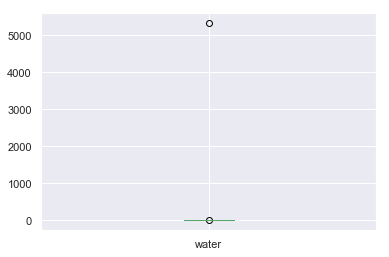

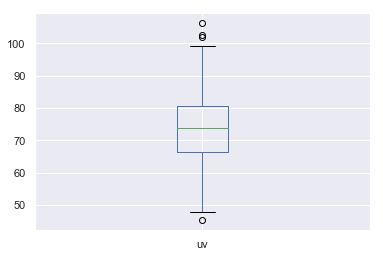

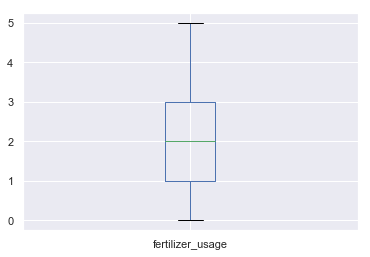

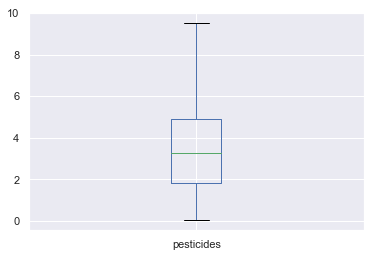

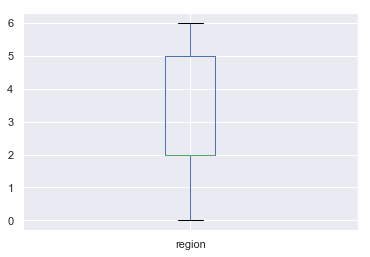

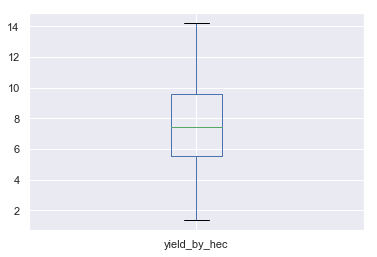

In [246]:
columns=['water','uv','fertilizer_usage','pesticides','region','yield_by_hec']

for column in columns:
    if is_numeric_dtype(df[column]):
        plt.figure()
        df.boxplot([column])

In [247]:
water_outlier = df[df['water']>5000]
water_outlier

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,yield_by_hec
36,586,5340.0,91.224,8.429,2,67.321,2.933,0,"c,a",7.986831


In [248]:

#replaced the outlier with null
df.loc[36, 'water']=np.nan
 
 

In [249]:
df.corr()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,yield_by_hec
id,1.000000,0.050917,-0.004991,-0.035514,-0.013106,-0.005227,-0.002752,-0.050065,0.014571
water,0.050917,1.000000,-0.038403,-0.209199,0.364064,0.226730,-0.011469,-0.000877,0.469612
uv,-0.004991,-0.038403,1.000000,0.121360,-0.043042,0.054515,0.005912,-0.047957,-0.082630
area,-0.035514,-0.209199,0.121360,1.000000,-0.202512,0.491220,0.036302,0.369481,-0.366275
fertilizer_usage,-0.013106,0.364064,-0.043042,-0.202512,1.000000,0.452183,-0.056462,0.022406,0.679435
yield,-0.005227,0.226730,0.054515,0.491220,0.452183,1.000000,0.048380,-0.045051,0.579422
pesticides,-0.002752,-0.011469,0.005912,0.036302,-0.056462,0.048380,1.000000,-0.010899,0.031391
region,-0.050065,-0.000877,-0.047957,0.369481,0.022406,-0.045051,-0.010899,1.000000,-0.355008
yield_by_hec,0.014571,0.469612,-0.082630,-0.366275,0.679435,0.579422,0.031391,-0.355008,1.000000


In [250]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
lbl.fit(list(train['categories'].values)) 
df['categories_id'] = lbl.transform(list(df['categories'].values))
len(df['categories_id'].unique())
df['categories_id'].unique()

array([16, 34, 47, 46, 41, 14, 22,  7, 36, 55, 21, 20, 39, 31, 26, 33, 48,
       10, 15, 24, 30, 28,  0, 35, 40, 52, 29,  9, 18, 37, 23, 32, 60, 25,
       51,  5, 19, 58, 42,  1, 57, 54,  8, 11, 50,  2, 56, 61,  6, 49, 17,
        3, 53, 44, 38, 27, 13, 43, 12, 45,  4, 59], dtype=int64)

In [251]:
df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories,yield_by_hec,categories_id
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c",2.469659,16
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d",2.533752,34
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a",8.037360,47
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d,10.034322,46
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d",5.389310,41


In [252]:
df.drop(['id','area','yield','categories' ], axis=1, inplace=True)
df.head()

,water,uv,fertilizer_usage,pesticides,region,yield_by_hec,categories_id
0,5.615,65.281,0,8.969,0,2.469659,16
1,7.044,73.319,0,7.197,0,2.533752,34
2,5.607,60.038,2,7.424,0,8.037360,47
3,9.346,64.719,2,1.256,0,10.034322,46
4,7.969,NaN,1,0.274,0,5.389310,41


2.2 check distribution

In [253]:
# Determining the Skewness of data 
print ("Skew is:", df.yield_by_hec.skew())

Skew is: 0.19793832202783265


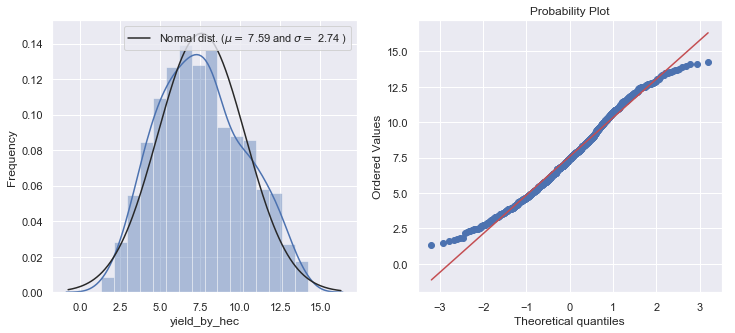

In [254]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.distplot(df.yield_by_hec, fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df.yield_by_hec)

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

plt.subplot(1,2,2)
stats.probplot(df.yield_by_hec, plot=plt)
plt.show()

skewness is less than 0.5, symmetrical

In [255]:
df = df.copy()
df.describe()

,water,uv,fertilizer_usage,pesticides,region,yield_by_hec,categories_id
count,957.000000,949.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.656381,73.957488,2.12300,3.452301,3.039000,7.588364,29.355000
std,2.820320,9.904063,1.52256,2.076921,1.883886,2.738814,16.700475
min,0.072000,45.264000,0.00000,0.014000,0.000000,1.336070,0.000000
25%,4.580000,66.502000,1.00000,1.804500,2.000000,5.542781,15.000000
50%,6.469000,73.689000,2.00000,3.275500,2.000000,7.431937,30.000000
75%,8.758000,80.554000,3.00000,4.916000,5.000000,9.585453,44.000000
max,15.214000,106.310000,5.00000,9.532000,6.000000,14.232703,61.000000


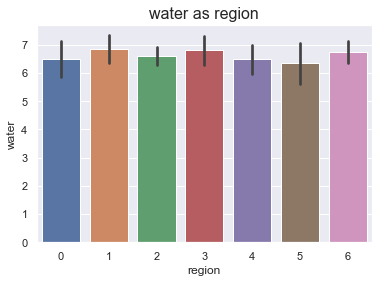

,region,water
1,1,6.843511
3,3,6.793541
6,6,6.752131
2,2,6.598467
0,0,6.489472
4,4,6.485313
5,5,6.338164


In [256]:
sns.barplot(x='region', y='water', data=df)
plt.ylabel("water")
plt.title("water as region", fontsize=16)
plt.show()
df[["region", "water"]].groupby(['region'], as_index=False).mean().sort_values(by='water', ascending=False)

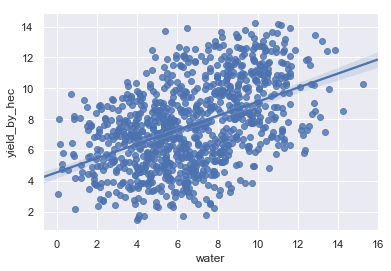

Skew is: 0.11611774643522087


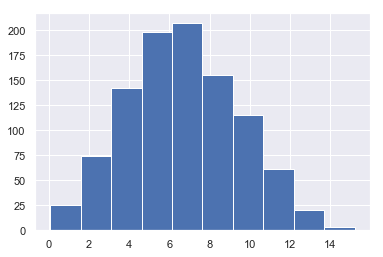

In [257]:

sns.regplot(x='water',y='yield_by_hec',data=df)
plt.show()

print ("Skew is:", train.water.skew())
plt.hist(train.water)
plt.show()

In [258]:
columns=['water','uv','fertilizer_usage','pesticides','region','yield_by_hec','categories_id']

for column in columns:
    if is_numeric_dtype(df[column]):
        print(column +" Skew is:", df[column].skew()   )

water Skew is: 0.10371839712746198
uv Skew is: 0.18588570075809727
fertilizer_usage Skew is: 0.14622979335885092
pesticides Skew is: 0.3899279865414328
region Skew is: 0.3738597525749813
yield_by_hec Skew is: 0.19793832202783265
categories_id Skew is: -0.08863191984931458


2.3 check missing data

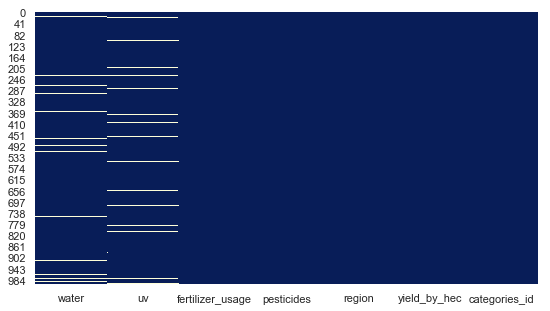

In [259]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

2.4 fill the null with averge in the region

In [260]:
df['water'] = df.groupby("region")["water"].transform(lambda x: x.fillna(x.median()))
df['uv'] = df.groupby("region")["uv"].transform(lambda x: x.fillna(x.median()))

# 3. Finding features

Fertilizer is the most important factor, followed by water and region

In [261]:
df.corr()

,water,uv,fertilizer_usage,pesticides,region,yield_by_hec,categories_id
water,1.000000,-0.035676,0.358358,-0.011032,0.000459,0.461054,0.019943
uv,-0.035676,1.000000,-0.041516,0.004933,-0.047448,-0.079780,-0.010400
fertilizer_usage,0.358358,-0.041516,1.000000,-0.056462,0.022406,0.679435,0.080400
pesticides,-0.011032,0.004933,-0.056462,1.000000,-0.010899,0.031391,-0.007557
region,0.000459,-0.047448,0.022406,-0.010899,1.000000,-0.355008,-0.005054
yield_by_hec,0.461054,-0.079780,0.679435,0.031391,-0.355008,1.000000,0.041350
categories_id,0.019943,-0.010400,0.080400,-0.007557,-0.005054,0.041350,1.000000


#### 3.1 Fertilizer

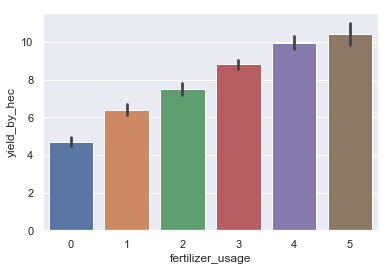

In [263]:
sns.barplot(df.fertilizer_usage, df.yield_by_hec)

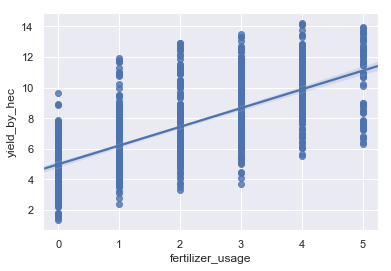

In [264]:
sns.regplot(x='fertilizer_usage',y='yield_by_hec',data=df)
plt.show()

#### 3.2 Water

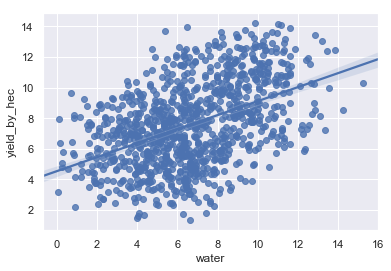

In [265]:
sns.regplot(x='water',y='yield_by_hec',data=df)
plt.show()

#### 3.3 Region

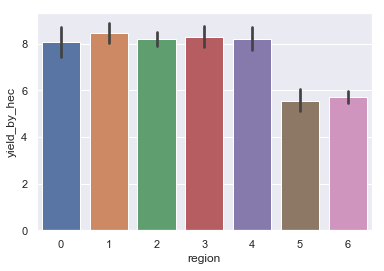

In [266]:
sns.barplot(df.region, df.yield_by_hec)

uv is related to region, so check uv based on region

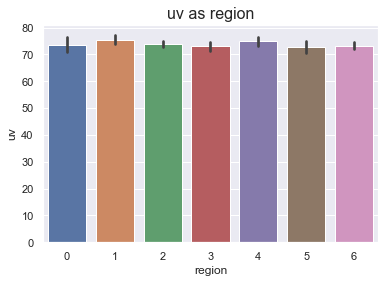

,region,uv
1,1,75.468545
4,4,74.925451
2,2,73.994366
0,0,73.663559
6,6,73.250630
3,3,73.054976
5,5,72.682246


In [267]:
sns.barplot(x='region', y='uv', data=df)
plt.ylabel("uv")
plt.title("uv as region", fontsize=16)
plt.show()
df[["region", "uv"]].groupby(['region'], as_index=False).mean().sort_values(by='uv', ascending=False)

# 4. Prediction

#### 4.1 Split data

In [268]:
y = df['yield_by_hec']

In [269]:
X=df[['water','uv','fertilizer_usage','pesticides','region','categories_id']]
#X=df[[ 'water','fertilizer_usage', 'region' ]]

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=80, test_size=.33)

#### 4.2 Prediction

LinearRegression

In [271]:
#Train the model
from sklearn import linear_model
model_linear = linear_model.LinearRegression()

In [272]:
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
print ("R^2 is: \n", model_linear.score(X_test, y_test)*100)

R^2 is: 
 67.66176972494544


In [274]:
prediction_linear=  model_linear.predict(X_test)
print ('MSE is: \n', mean_squared_error(y_test, prediction_linear))

MSE is: 
 2.4324718030833408


RandomForestRegressor gives a much better prediction

In [275]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=1000)

In [276]:
model_random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [277]:
print ("R^2 is: \n", model_random.score(X_test, y_test)*100)

R^2 is: 
 88.31948319631474


In [278]:
prediction_random=  model_random.predict(X_test)
print ('MSE is: \n', mean_squared_error(y_test, prediction_random))

MSE is: 
 0.8786049059809791


#### GradientBoostingRegressor is even better

In [279]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [280]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [281]:
print ("R^2 is: \n", GBR.score(X_test, y_test)*100)

R^2 is: 
 90.62274380653776


In [282]:
from sklearn.metrics import mean_squared_error
prediction_gradient = GBR.predict(X_test)
print ('MSE is: \n', mean_squared_error(y_test, prediction_gradient))

MSE is: 
 0.705354346446129


#### 4.3 Compare the predictions with actual values

Text(0.5, 1.0, 'Linear Regression Model')

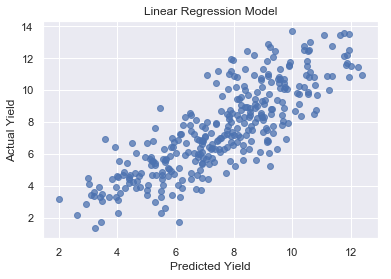

In [283]:
actual_values = y_test
plt.scatter(prediction_linear, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

Text(0.5, 1.0, 'RandomForestRegressor Model')

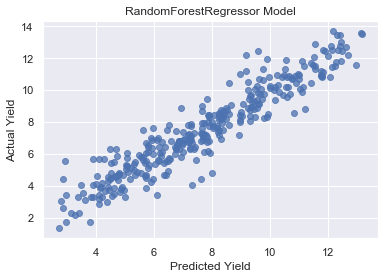

In [284]:
actual_values = y_test
plt.scatter(prediction_random, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('RandomForestRegressor Model')
#pltrandom_state=None.show()

Text(0.5, 1.0, 'GradientBoostingRegressorr Model')

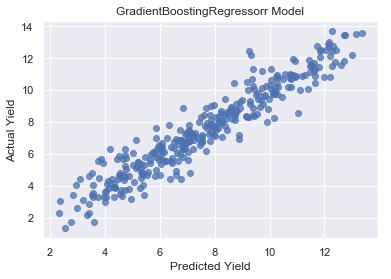

In [285]:
actual_values = y_test
plt.scatter(prediction_gradient, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Yield')
plt.ylabel('Actual Yield')
plt.title('GradientBoostingRegressorr Model')
#pltrandom_state=None.show()

In [300]:
dftest  = pd.DataFrame({'yield_actual': y_test, 'yield_prediction' :prediction_gradient })

In [301]:
dftest.head()

,yield_actual,yield_prediction
647,11.011380,10.737395
721,10.916746,11.292277
432,9.137083,9.272069
476,11.111799,11.455541
22,7.332334,7.289612


In [303]:
df1=dftest.sort_index()


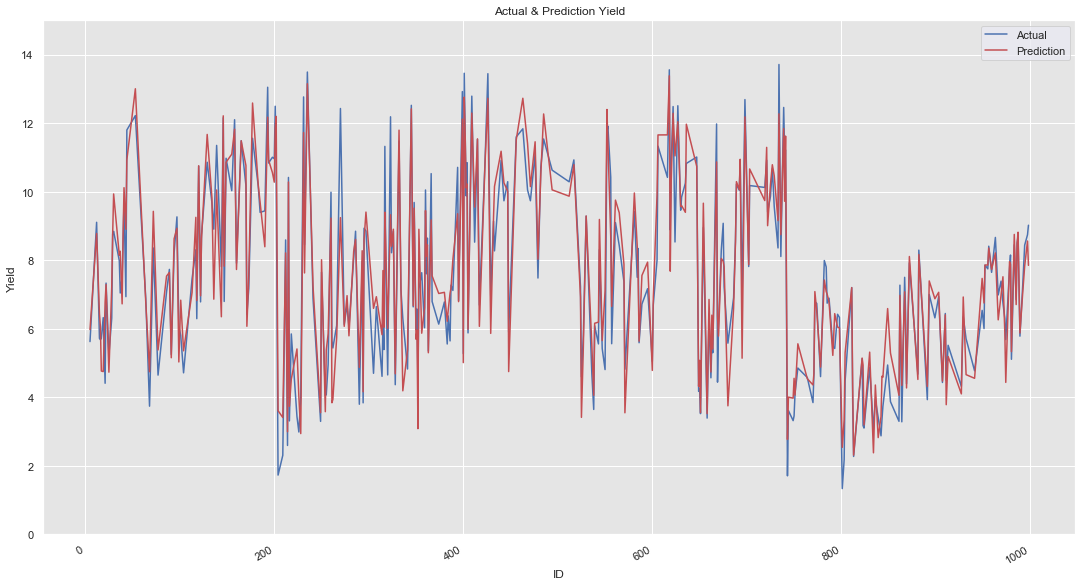

In [312]:
y1=df1['yield_actual']
y2=df1['yield_prediction']
plt.plot(  y1, '-b',  label='Actual'  )
plt.plot(  y2, '-r',  label='Prediction' )
plt.title('Actual & Prediction Yield')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
plt.legend( )

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('ID')
plt.ylabel('Yield')
plt.ylim(0, 15)
fig.autofmt_xdate()
plt.show()
plt.close()